In [1]:
import pandas as pd

In [4]:
x_train = pd.read_csv('news_set/train.csv').set_index('date')
x_valid = pd.read_csv('news_set/validate.csv').set_index('date')
x_test = pd.read_csv('news_set/test.csv').set_index('date')
x_train = x_train['title'].groupby(x_train.index).apply(list).apply(pd.Series).fillna('')
x_valid = x_valid['title'].groupby(x_valid.index).apply(list).apply(pd.Series).fillna('')
x_test = x_test['title'].groupby(x_test.index).apply(list).apply(pd.Series).fillna('')
label = pd.read_csv('price_set/train(1020)_label.csv').set_index('Date')
#y_train = label['Close'].values

In [3]:
###################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ label statistics
#lable data doesn't conclude prices in weekends, however, news conclude
label

,Close
Date,
2006-10-20,1.0
2006-10-23,1.0
2006-10-24,1.0
2006-10-25,1.0
2006-10-26,1.0
...,...
2012-06-15,1.0
2012-06-18,1.0
2012-06-19,1.0


In [5]:
categories = label['Close']
cates = label.groupby('Close')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 2
Close
0.0    647
1.0    781
dtype: int64


In [ ]:
###########################################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [7]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
date,,,,,,,,,,,,,,,,,,,,,
2006-10-20,exxon mobil offer plan to end alaska dispute .,,,,,,,,,,...,,,,,,,,,,
2006-10-23,royal dutch bid for shell canada low sharehold...,dow end at record high texas instrument off la...,shell look to buy out canada unit for c xxx bi...,ford be review all product brand ceo .,at t earnings beat expectation .,australia foster say confident on target .,ford win t sell ford credit .,kimberly clark see high cost this year .,,,...,,,,,,,,,,
2006-10-24,microsoft to start vista coupon plan for pc bu...,dst system post low q3 net profit .,u . s . tech stock fall on texas instrument ou...,ge wal mart shenzhen bank tie up on china cred...,lockheed martin ups forecast .,microsoft to defer xxx billion in sale to thir...,jim cramer bare escentuals allergan medicis av...,pepsico look to new product acquisition .,amazon profit beat expectation .,phelps dodge net double but off wall st . targ...,...,,,,,,,,,,
2006-10-25,boeing profit tops view but forecast disappoin...,u . s . stock gain exxon and altria jump .,amazon profit beat forecast .,honda q2 drop on finance loss yen lift f cast .,exist home sale fall for 6th straight month .,radioshack post quarter loss a cost rise .,altria net hit by spain conwood lifts reynolds .,stock see up slightly after amazon result .,altria promise january detail for kraft .,gm signal it be closer to labor deal with delp...,...,,,,,,,,,,
2006-10-26,analyst sound note of caution on gm cash burn .,comcast third quarter profit up on record sub ...,microsoft profit rise 11 percent .,instant view 4 microsoft post high result .,dow chemical earnings rise on strong sale .,stock gain on strong profit microsoft up late .,microsoft cfo say tender offer lower outlook .,exxon post huge profit on high price output .,gm post profit but recovery loom .,u . s . sept new home sale durables rise .,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-17,u . k . home seller push ask price to record r...,end u . s . student loan don t make them cheap .,third fed stimulus win t be good than qe2 romn...,iran nuclear offer isn t enough to delay eu oi...,rwe win t build more nuclear power station sue...,supreme court s super monday don t serve justi...,new index show low growth for major economy .,microsoft nears deal to buy yammer source .,exxon drop shale exploration plan in poland pa...,irish asset sale win t be impact by euro crisi...,...,,,,,,,,,,
2012-06-18,dollar shortage see in 2 trillion gap say morg...,microsoft tablet must shed office image to cha...,ups sell xxx million yuan commercial paper for...,kenya coffee auction recess start on july 18 a...,morgan stanley may settle nuns u . k . bond la...,blackrock s rice to stop co manage five energy...,wto china steel facebook sec gupta verdict com...,pfizer s drug for rare nerve disease reject by...,tui see no jump in cost of travel to greece ce...,gm say to report xxxth facility go landfill fr...,...,,,,,,,,,,
2012-06-19,wal mart mom tear on health care become campai...,pemex sell xxx billion of bond abroad amid rec...,danone cut profitability goal on southern euro...,sumitomo mitsui trust target 32 increase in ov...,metlife win feed extension to resubmit capital...,kodak sue apple in bid to quash claim over pat...,microsoft unveils surface tablet computer to r...,deutsche bahn see eu20 million airport delay c...,u . s . soybean stock see low a shipment stren...,nestle shrug off low spain demand a danone cut...,...,,,,,,,,,,


In [6]:
x_train.shape, label.shape

((1976, 132), (1428, 1))

In [8]:
x_train_buffer = []
label_buffer = []
#batch_size = 32
#k = batch_size * 20
index = 0

def __iter__(self):
        return self

def reset():
    # self.source.seek(0)
    # self.label.seek(0)
    index = 0

def __next__():
    if end_of_data:
        end_of_data = False
        reset()
        raise StopIteration


In [9]:
assert len(x_train_buffer) == len(label_buffer), 'Buffer size mismatch!'

In [10]:
count = 0
for j, i in enumerate(label.index.values[index:]):
    count+=1
    #print(i) #20061020-20090507
    try:
        #print(x_train.loc[i].values)
        ss = list(filter(lambda x: len(x.split()) > 0, x_train.loc[i].values))
        ll = label.loc[i].values
    except KeyError as e:  # out of length
            print(i + ' ' + str(e))
            continue
            
    x_train_buffer.append(ss)
    label_buffer.append(int(ll))
if 'j' in locals():
    index += j + 1
#print(ss)
print(count) #index:index+k-->640 = 32 *20; index: 1428(2012-06-21)

2006-11-27 '2006-11-27'
2009-08-19 '2009-08-19'
1428


In [11]:
len(x_train_buffer),len(label_buffer)

(1426, 1426)

In [12]:
assert len(x_train_buffer) == len(label_buffer), 'Buffer size mismatch!'

In [13]:
import numpy

tlen = numpy.array([len(t) for t in x_train_buffer])  # len(t)-->每天的新闻条数
tidx = tlen.argsort() #返回索引值，数组值从小到大排列之后的索引值
tidx

array([   0,  779,  810, ..., 1247, 1236, 1235])

In [29]:
len(tlen)

1426

In [28]:
import math
import random

batch_size = 32
tindex = []
##Todo shuffle
small_index = list(range(int(math.ceil(len(tidx) * 1. /batch_size)))) #len(tidx)=1425 / 32 = 44.53125    math.ceil(44.53125)=45
#math.ceil-->传回大于等于所给数字的最小整数，eg math.ceil(0.95)=1
#print(small_index)   - [0,1,...,44]
random.shuffle(small_index)
print(small_index)
# len(tidx)#1425

[18, 11, 8, 12, 21, 19, 10, 44, 16, 33, 39, 38, 1, 15, 2, 32, 22, 29, 3, 31, 20, 0, 9, 42, 13, 4, 17, 36, 26, 7, 43, 25, 27, 37, 30, 28, 5, 24, 34, 40, 23, 41, 6, 35, 14]


In [30]:
#can only run once!!!有extend!!

for i in small_index:
    #print(i)
    if (i + 1) * batch_size > len(tidx):
        tindex.extend(tidx[i * batch_size:])
    else:
        tindex.extend(tidx[i * batch_size:(i + 1) * batch_size])
tidx = tindex
len(tidx)#1425

1426

In [31]:
_sbuf = [x_train_buffer[i] for i in tidx]
_lbuf = [label_buffer[i] for i in tidx]
x_train_buffer = _sbuf
label_buffer = _lbuf
##TODO delete useless
del _sbuf, _lbuf


In [32]:
temp = []
for i in (x_train_buffer):
    temp.append([j.strip().split() for j in i])  # split words and save to array
    
x_train_buffer = temp
##TODO delete useless
del temp

In [33]:
x_train_buffer[0]

[['infineon',
  'up',
  'on',
  'talk',
  'of',
  'interest',
  'from',
  'samsung',
  'intel',
  '.'],
 ['medtronic', 'to', 'cut', 'about', 'xxx', 'job', '.'],
 ['blackrock',
  'buying',
  'ubs',
  'subprime',
  'debt',
  'for',
  '15',
  'billion',
  'ft',
  '.'],
 ['ubs', 'to', 'cut', 'xxx', 'job', 'have', 'blackrock', 'debt', 'deal', '.'],
 ['pfizer', 'drop', 'glaucoma', 'drug', 'nicox', 'share', 'slump', '.'],
 ['microsoft', 'exec', 'say', 'at', 'end', 'of', 'road', 'on', 'yahoo', '.'],
 ['yahoo', 'ceo', 'open', 'to', 'more', 'microsoft', 'talk', '.'],
 ['qwest', 'post', 'low', 'quarter', 'profit', '.'],
 ['without', 'yahoo', 'microsoft', 'remain', 'alone', 'on', 'the', 'web', '.'],
 ['microsoft', 'gate', 'not', 'rule', 'out', 'deal', 'post', 'yahoo', '.']]

In [34]:
import pickle as pkl

#vocabulary size:24759
#n_words = 24759 #7634 only train-->from vocab_cased_title.pickle'

#processing the vocab cases for title
#before dropping the words that occurs less than 5 times 23383
#Dict size 7283
#Done

with open('news_set/vocab_cased_new_title.pickle', 'rb') as f:
          dict = pkl.load(f)
        
#print(dict[])
word_index = max(list(dict.values()))
vocab_size = word_index+1
print('vocabulary size:{}'.format(vocab_size))  #vocabulary size:24759

vocabulary size:7283


In [35]:
########## 有pop(0),只能运行一次！！
sour = []
lab = []
sour_ori = []


try:
    while True:
        source_temp = []
        try:
            j = x_train_buffer.pop(0)  # 1 day before
            sour_ori.append(j)
        except IndexError:
            break
            
        for i in j:  # deal with 1 day before
            sss = [dict[w] if w in dict else 1 for w in i]  # 1 means _UNK_
            if vocab_size > 0:
                sss = [w if w < vocab_size else 1 for w in sss]  # 1 means _UNK_
            source_temp.append(sss)
        
        # read label
        ll1 = label_buffer.pop(0)
        sour.append(source_temp)
        lab.append(ll1)

except IOError:
    end_of_data = True

In [48]:
#sour[0],sour_ori[0]
changdu = []   #training set里所有新闻的长度 < 22
for jj in range(len(sour)):
    for kk in range(len(sour[jj])):
        changdu.append(len(sour[jj][kk]))

#changdu.index(max(changdu))
#len(changdu)  #42529  --> 46136减去了部分weekends的新闻
#max(changdu)  22

22

In [41]:
####################################################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@  News numbers in one day  --> statistics
#maxlen_titles = 92  #--> 所有新闻条数中每天最多有92 个字
#maxlen_titles = 22 #--> 所有新闻条数中每天最多有92 条
counter = []
for i in range(len(sour)):
    counter.append(len(sour[i]))  #每天的新闻条数
print(counter)  
#len(counter) #1426个date
#maxlen__x = counter.index(max(counter))  index[432]maxsequence=104条
maxlen__x = max(counter)
maxlen__x  ##一天的新闻条数 -- 一天最多有104条

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 109, 110, 111, 111, 111, 112, 112, 113, 114, 115, 116, 117, 121, 125, 125, 125, 132, 132, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 57, 57, 57, 57, 

132

In [49]:
pd.Series(counter).describe()

count    1426.000000
mean       29.823983
std        31.665697
min         1.000000
25%         8.000000
50%        12.000000
75%        58.750000
max       132.000000
dtype: float64

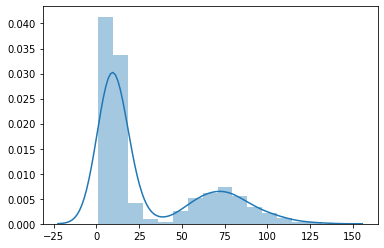

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(counter)#, bins=10)
plt.show()

In [59]:
#